<a href="https://colab.research.google.com/github/Rohin107/codingground/blob/master/JKM_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import all the required libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

In [3]:
df = pd.read_csv('/content/JKM_15122023.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')

In [14]:
# prompt: rearrange the df in ascending order of date

df.sort_index(inplace=True)


In [15]:
df.head()

,JKM
Date,
2009-02-02,7.00
2009-02-03,7.10
2009-02-04,7.00
2009-02-05,6.90
2009-02-06,6.95


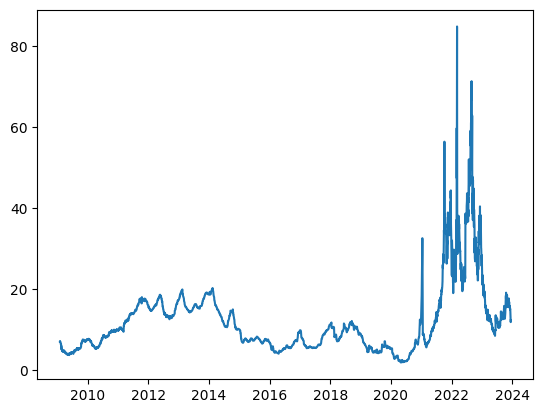

In [16]:
plt.plot(df)

In [17]:
dataset = df.values.astype('float32')

In [18]:
train_size = int(len(dataset) * 0.90)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [19]:
#Use TimeseriesGenerator to organize training data into the right format
from keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data
seq_size = length = 45
batch_size = 1
train_generator = TimeseriesGenerator(train,train,length=length,batch_size=batch_size)
print("Total number of samples in the original training data = ", len(train))
print("Total number of samples in the generated data = ", len(train_generator))

Total number of samples in the original training data =  3355
Total number of samples in the generated data =  3310


In [20]:
x, y = train_generator[0]

In [21]:
# prompt: print x, y

print(x, y)


[[[7.  ]
  [7.1 ]
  [7.  ]
  [6.9 ]
  [6.95]
  [6.85]
  [6.8 ]
  [6.6 ]
  [6.4 ]
  [6.3 ]
  [6.4 ]
  [5.2 ]
  [6.  ]
  [5.9 ]
  [5.7 ]
  [5.25]
  [5.  ]
  [4.95]
  [5.  ]
  [4.8 ]
  [4.6 ]
  [4.7 ]
  [4.65]
  [4.9 ]
  [4.9 ]
  [4.7 ]
  [4.65]
  [4.75]
  [4.55]
  [4.4 ]
  [4.5 ]
  [4.65]
  [4.55]
  [4.6 ]
  [4.7 ]
  [4.75]
  [4.8 ]
  [4.7 ]
  [4.6 ]
  [4.7 ]
  [4.4 ]
  [4.4 ]
  [4.3 ]
  [4.5 ]
  [4.4 ]]] [[4.35]]


In [22]:
validation_generator = TimeseriesGenerator(test, test, length=length ,batch_size=batch_size)

In [27]:
print(len(validation_generator))

328


In [32]:
x, y = validation_generator[327]

In [33]:
print (x,y)

[[[15.782]
  [15.349]
  [16.774]
  [18.345]
  [17.575]
  [19.055]
  [17.905]
  [18.705]
  [18.044]
  [18.54 ]
  [17.764]
  [17.55 ]
  [17.575]
  [18.42 ]
  [17.319]
  [16.044]
  [16.299]
  [16.367]
  [15.807]
  [15.562]
  [15.621]
  [15.541]
  [15.962]
  [15.691]
  [16.56 ]
  [17.225]
  [17.3  ]
  [17.638]
  [16.707]
  [16.211]
  [16.733]
  [16.79 ]
  [16.067]
  [15.636]
  [15.797]
  [15.278]
  [15.785]
  [15.492]
  [14.908]
  [15.048]
  [15.097]
  [14.764]
  [12.79 ]
  [12.562]
  [11.788]]] [[12.266]]


In [34]:
num_features = 1
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length, num_features)))
model.add(LSTM(50, activation='relu'))
#model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()
print('Train...')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 45, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Train...


In [35]:
model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)

Epoch 1/100


<ipython-input-35-daaa088ad6be>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator=train_generator, verbose=2, epochs=100, validation_data=validation_generator)


3310/3310 - 100s - loss: 18956.7266 - val_loss: 153.0121 - 100s/epoch - 30ms/step
Epoch 2/100
3310/3310 - 97s - loss: 25.3759 - val_loss: 282.6272 - 97s/epoch - 29ms/step
Epoch 3/100
3310/3310 - 95s - loss: 36.0746 - val_loss: 60.2429 - 95s/epoch - 29ms/step
Epoch 4/100
3310/3310 - 99s - loss: 83.5208 - val_loss: 119.5858 - 99s/epoch - 30ms/step
Epoch 5/100
3310/3310 - 95s - loss: 910.5273 - val_loss: 111.6358 - 95s/epoch - 29ms/step
Epoch 6/100
3310/3310 - 98s - loss: 5917.0537 - val_loss: 196.4208 - 98s/epoch - 30ms/step
Epoch 7/100
3310/3310 - 95s - loss: 16540.1562 - val_loss: 7837.1919 - 95s/epoch - 29ms/step
Epoch 8/100
3310/3310 - 96s - loss: 302.6989 - val_loss: 400.6119 - 96s/epoch - 29ms/step
Epoch 9/100
3310/3310 - 98s - loss: 30.2702 - val_loss: 104.6262 - 98s/epoch - 30ms/step
Epoch 10/100
3310/3310 - 95s - loss: 12.1044 - val_loss: 44.9571 - 95s/epoch - 29ms/step
Epoch 11/100
3310/3310 - 96s - loss: 9.4575 - val_loss: 22.0417 - 96s/epoch - 29ms/step
Epoch 12/100
3310/3310

In [36]:
trainPredict = model.predict(train_generator)
testPredict = model.predict(validation_generator)

328/328 [==============================] - 2s 7ms/step


In [37]:
trainScore = math.sqrt(mean_squared_error(train[length:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(test[length:], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 3.68 RMSE
Test Score: 7.80 RMSE


In [55]:
# prompt: print size of dataset

print(len(dataset), len(trainPredict), len(testPredict))


3728 3310 328


In [46]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[length:len(trainPredict)+length, :] = trainPredict

In [47]:
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(seq_size*2)-1:len(dataset)-1, :] = testPredict

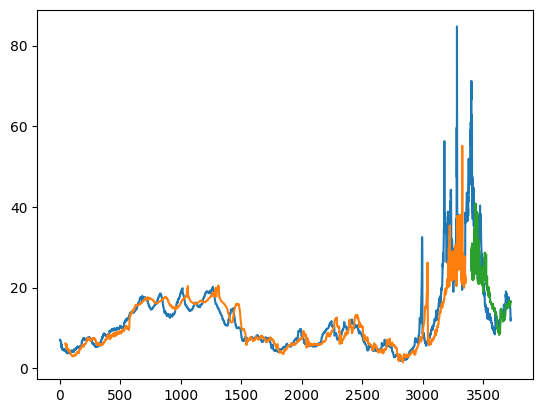

In [48]:
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
# plt.plot(trainPredict)
# plt.plot(testPredict)
plt.show()